In [3]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import xarray as xr
import numpy as np
import pprint
import glob
import skill_metrics as sm

cmip6_shdr_ens_all = xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/shdr.nc")


SUBPLOTS_DATA= [{'axis_idx': (0, 0),
  'title': '(a) North Pacific',
  'y_label': True,
  'x_label': False,
  'observed': (0.6417962561010375, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.5290332755904883,
    0.1842444317717712,
    0.9687355721981312),
   'NorESM2-LM': (0.5650551909528806, 0.16734024028641906, 0.969511172925415),
   'CMCC-CM2': (0.6579345572047829, 0.161183426979646, 0.9695452371825725),
   'MIROC6': (0.607964836722385, 0.1819415248921513, 0.9590479126780465),
   'IPSL-CM6A-LR': (0.8953953851559179,
    0.3134609420889149,
    0.9704650046027173),
   'NESM3': (0.8080119742712967, 0.2451089260380796, 0.9687118868061988),
   'FGOALS-f3-L': (0.48546413680627065,
    0.23098398063112474,
    0.9535995851496724),
   'EC-Earth3-Veg': (0.7832262097153558,
    0.2234630815820434,
    0.9702257755078825),
   'SAM0-UNICON': (0.5581379328307466,
    0.17799497495104596,
    0.9655461342917557),
   'MPI-ESM2': (0.6069263177272459, 0.16670077466308492, 0.9658900333892217),
   'EC-Earth3': (0.762159332205683, 0.20856153067832478, 0.970345924227985),
   'BCC-CSM2-MR': (0.5615598617896779, 0.1750904452080374, 0.9664007859209086),
   'ACCESS-CM2': (0.6090875495554307, 0.159781614084697, 0.9687136452139858),
   'CESM2': (0.5944866190821623, 0.16832977622673542, 0.9658007540272857),
   'GFDL-ESM4': (0.6703527938894845, 0.16334547624152299, 0.9699390163801195),
   'E3SM-1-1-ECA': (0.6871796369019576,
    0.17310597025526797,
    0.9683626183890319),
   'BCC-ESM1': (0.5902465105912577, 0.17064625537552416, 0.9650719235035415),
   'UKESM1-1': (0.7203947440902296, 0.1844893357065882, 0.9698726132275033),
   'MRI-ESM2': (0.6735216289695873, 0.16153904534955427, 0.9709802532371005),
   'CanESM5': (0.5678421871271957, 0.16437674826759613, 0.9704333075506536),
   'GISS-E2': (0.572751174377712, 0.17314638725558326, 0.9657057069968105),
   'FIO-ESM2': (0.5442051740168142, 0.18847802943494743, 0.9627794623240525)}},
 {'axis_idx': (0, 1),
  'title': '(b) Tropical Pacific',
  'y_label': False,
  'x_label': False,
  'observed': (0.059060911205874894, 0.0, 0.9999999999999999),
  'modeled': {'E3SM-1-0': (0.049655029072101974,
    0.03194437417263849,
    0.8411052008555477),
   'NorESM2-LM': (0.0536046278252138, 0.03293516270706497, 0.8333900001369154),
   'CMCC-CM2': (0.08819981273071338, 0.04304535146726388, 0.9036479539122563),
   'MIROC6': (0.03981333724944084, 0.03969877498172265, 0.7436596300234186),
   'IPSL-CM6A-LR': (0.07434986662428263,
    0.04470835931334133,
    0.7990188395519076),
   'NESM3': (0.11790139506974788, 0.0680618159201575, 0.9159739262244789),
   'FGOALS-f3-L': (0.03271086838791329,
    0.03572447574429039,
    0.8493961224688089),
   'EC-Earth3-Veg': (0.05508827681872957,
    0.03513041940519048,
    0.8127646161424777),
   'SAM0-UNICON': (0.04002287602784064,
    0.03254108399732195,
    0.8526780947437911),
   'MPI-ESM2': (0.06034577673220292, 0.018763003630215127, 0.9508428873809356),
   'EC-Earth3': (0.052741902572965, 0.03976730710375436, 0.7525655932634375),
   'BCC-CSM2-MR': (0.044964706304436254,
    0.0393150089236836,
    0.7463966215824369),
   'ACCESS-CM2': (0.05971019412903123,
    0.03886615512079769,
    0.7858868608849218),
   'CESM2': (0.0350731424903122, 0.03203501518838042, 0.8911803885304665),
   'GFDL-ESM4': (0.0644297155486022, 0.021903612271709547, 0.9407475347452153),
   'E3SM-1-1-ECA': (0.05961525598951059, 0.02463013120901, 0.913895499997774),
   'BCC-ESM1': (0.05528556074138702, 0.04229432035921118, 0.7282635384283017),
   'UKESM1-1': (0.08680456911750889, 0.053639145296917545, 0.7944658411871155),
   'MRI-ESM2': (0.05805346898524303, 0.05483010831289046, 0.5617385711776087),
   'CanESM5': (0.061187598295114685, 0.03640840449434502, 0.8172213688663094),
   'GISS-E2': (0.060229357637474404, 0.027899358541538095, 0.8907836532132146),
   'FIO-ESM2': (0.052473311637761, 0.017189150752514815, 0.9593319546450682)}},
 {'axis_idx': (0, 2),
  'title': '(c) South Pacific',
  'y_label': False,
  'x_label': False,
  'observed': (0.4322164973014129, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.5327770760077902,
    0.1697187032882685,
    0.9594137338475608),
   'NorESM2-LM': (0.5206624634895496, 0.15717995613155733, 0.9624890425477663),
   'CMCC-CM2': (0.5034710828780659, 0.1580670014848284, 0.9542573928250719),
   'MIROC6': (0.4441372843179086, 0.12529860985684182, 0.9594776100627503),
   'IPSL-CM6A-LR': (0.5630322039333996,
    0.18938013891515643,
    0.9614712375858957),
   'NESM3': (0.7409850712802164, 0.35380243973015785, 0.9534166338527056),
   'FGOALS-f3-L': (0.45481899794883923,
    0.13581340793805918,
    0.9543840072121781),
   'EC-Earth3-Veg': (0.6233731965575726,
    0.2414062889192929,
    0.959663109474567),
   'SAM0-UNICON': (0.4967548723499908,
    0.14521011379476143,
    0.9605954123239431),
   'MPI-ESM2': (0.4969089367634888, 0.14229483496941694, 0.9626052502734539),
   'EC-Earth3': (0.6175878976313641, 0.23548258341247885, 0.9604964626210063),
   'BCC-CSM2-MR': (0.5108541034052555,
    0.15407471532561806,
    0.9602464245898404),
   'ACCESS-CM2': (0.4927615851035416, 0.14167683221230523, 0.961483140922092),
   'CESM2': (0.46367128685016945, 0.13136119675805152, 0.9594165608185654),
   'GFDL-ESM4': (0.5398075170207854, 0.1762676508557691, 0.9582226503940825),
   'E3SM-1-1-ECA': (0.5921553934428533,
    0.2147533346051265,
    0.9598761467725277),
   'BCC-ESM1': (0.5463555472552765, 0.17856597953777242, 0.9600707707293255),
   'UKESM1-1': (0.42643807317146515, 0.1201512057738876, 0.9609282104408167),
   'MRI-ESM2': (0.44288780411826856, 0.12259655829287992, 0.9610391464246503),
   'CanESM5': (0.4249301142030188, 0.11961131152895854, 0.9611955941964649),
   'GISS-E2': (0.5415567787984795, 0.1752265328456736, 0.9599498894430368),
   'FIO-ESM2': (0.4328211813755558, 0.12307127148769724, 0.9595178984927637)}},
 {'axis_idx': (1, 0),
  'title': '(d) North Atlantic',
  'y_label': True,
  'x_label': False,
  'observed': (0.6012425080660831, 0.0, 0.9999999999999998),
  'modeled': {'E3SM-1-0': (0.5084803741128844,
    0.17213111278712265,
    0.9656150964405533),
   'NorESM2-LM': (0.5117391582828503, 0.15535637100450142, 0.9737961725814568),
   'CMCC-CM2': (0.553245371468825, 0.15136862300778822, 0.96902196470428),
   'MIROC6': (0.549945440322247, 0.15288117348788852, 0.9686356752966512),
   'IPSL-CM6A-LR': (0.7864304182611384,
    0.24289674269208064,
    0.973876463479892),
   'NESM3': (0.784461592745762, 0.2460613641835475, 0.9714016036642726),
   'FGOALS-f3-L': (0.4271403910883758,
    0.22356171299158945,
    0.9617072689671436),
   'EC-Earth3-Veg': (0.6547382769681841,
    0.1621501348774813,
    0.9702394474417245),
   'SAM0-UNICON': (0.5294438459495135,
    0.15735858863807298,
    0.9692032825753734),
   'MPI-ESM2': (0.5928159782665724, 0.1466338938797015, 0.969936982047729),
   'EC-Earth3': (0.6226482190210535, 0.1500072277210081, 0.9705580027620412),
   'BCC-CSM2-MR': (0.545898924976312, 0.1483947359450771, 0.971119642539452),
   'ACCESS-CM2': (0.5759468645617885, 0.13971231676291376, 0.9727396065163292),
   'CESM2': (0.5392017380982418, 0.1566759502361757, 0.9680770041403138),
   'GFDL-ESM4': (0.6320388633206321, 0.1490210979086422, 0.9720284351860169),
   'E3SM-1-1-ECA': (0.6685436751540722,
    0.17935471661852018,
    0.9656198600744779),
   'BCC-ESM1': (0.5947764837388096, 0.14143422378079867, 0.9720895464285916),
   'UKESM1-1': (0.6798608538665164, 0.17204290343646703, 0.9713550188309285),
   'MRI-ESM2': (0.5717557216428125, 0.14351747561343536, 0.9713061807218516),
   'CanESM5': (0.5205062733092479, 0.1546314320163108, 0.9722119946785059),
   'GISS-E2': (0.501461289694725, 0.16765570897318277, 0.9698969243233148),
   'FIO-ESM2': (0.5048268305264533, 0.16750785445856134, 0.9690915073800774)}},
 {'axis_idx': (1, 1),
  'title': '(e) Tropical Atlantic',
  'y_label': False,
  'x_label': False,
  'observed': (0.0989690093445971, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.06747005429075502,
    0.0622213663258719,
    0.7843999836603854),
   'NorESM2-LM': (0.11076265112327742,
    0.07275940624792927,
    0.7648782903330092),
   'CMCC-CM2': (0.15329713394520192, 0.08653656467198363, 0.8504768013763709),
   'MIROC6': (0.20399902778871962, 0.1206170660724377, 0.9128963663539933),
   'IPSL-CM6A-LR': (0.19902921633689746,
    0.1168012187884449,
    0.9078452003222752),
   'NESM3': (0.14244612894706893, 0.08747616671150592, 0.7956475718773156),
   'FGOALS-f3-L': (0.09970648313837832,
    0.058876513374581906,
    0.8243842728783447),
   'EC-Earth3-Veg': (0.19304842293737257,
    0.11335000728242108,
    0.8953907778990926),
   'SAM0-UNICON': (0.08636777277767341,
    0.06810468294371416,
    0.7379739913241588),
   'MPI-ESM2': (0.12676215130488644, 0.05679501190084286, 0.9022274983580733),
   'EC-Earth3': (0.19705033225420016, 0.11581419880772732, 0.9027533887536515),
   'BCC-CSM2-MR': (0.11816219726714898,
    0.06138099721093007,
    0.8546633588153957),
   'ACCESS-CM2': (0.09522075633755957,
    0.04352802486359688,
    0.9002197198139252),
   'CESM2': (0.1095435058753247, 0.04586384260577336, 0.9081451735924186),
   'GFDL-ESM4': (0.16530424674140964, 0.09769624662155314, 0.8427813674565603),
   'E3SM-1-1-ECA': (0.12722232863433341,
    0.07869399519695411,
    0.785780884457834),
   'BCC-ESM1': (0.11708807645011582, 0.05254123248129509, 0.895052578889729),
   'UKESM1-1': (0.0869585969346345, 0.04104195360587686, 0.9105185307522107),
   'MRI-ESM2': (0.09362440600605862, 0.03647920512344509, 0.9297334552529521),
   'CanESM5': (0.12868161688085894, 0.059905647836574885, 0.8937674506169684),
   'GISS-E2': (0.10494161545943248, 0.04073291781517057, 0.9218417284965507),
   'FIO-ESM2': (0.0966408345727376,
    0.046531504653518796,
    0.8870943412337656)}},
 {'axis_idx': (1, 2),
  'title': '(f) South Atlantic',
  'y_label': False,
  'x_label': False,
  'observed': (0.42158767114436857, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.4478669245528121,
    0.13016466688310002,
    0.956962565491448),
   'NorESM2-LM': (0.4472816390551245, 0.12689857473496866, 0.9590518181418213),
   'CMCC-CM2': (0.4551686641972137, 0.13067662826297377, 0.9584438808000435),
   'MIROC6': (0.3905048148457472, 0.1326667767585712, 0.9494802707322754),
   'IPSL-CM6A-LR': (0.47530014421489264,
    0.1392434832541572,
    0.9588190892661008),
   'NESM3': (0.6838416385018568, 0.3023679912577145, 0.9607191791663737),
   'FGOALS-f3-L': (0.43914284232463163,
    0.14216852395792806,
    0.946246069703598),
   'EC-Earth3-Veg': (0.5641902769703754,
    0.20245048927395765,
    0.9565898558202978),
   'SAM0-UNICON': (0.48304359037640504,
    0.14531245444232455,
    0.9574287105555785),
   'MPI-ESM2': (0.4530451388468364, 0.13235849285615942, 0.9567294496447823),
   'EC-Earth3': (0.5484800966268835, 0.18898775433576004, 0.957586653750495),
   'BCC-CSM2-MR': (0.5007531290615679,
    0.15478660641693143,
    0.9580985954189586),
   'ACCESS-CM2': (0.4537483918763796, 0.13517809346890167, 0.95494176658019),
   'CESM2': (0.4312168396682868, 0.12849933718772616, 0.954841180284381),
   'GFDL-ESM4': (0.5049505142128786, 0.15175634901221427, 0.9622309352196631),
   'E3SM-1-1-ECA': (0.5654756542175596,
    0.2038323659192498,
    0.9562833584360441),
   'BCC-ESM1': (0.563160508963504, 0.20058473329346022, 0.9574778095340928),
   'UKESM1-1': (0.39523527380542134, 0.12298797663099965, 0.9566947356568153),
   'MRI-ESM2': (0.4097627798940282, 0.12299853102920086, 0.9566172811537522),
   'CanESM5': (0.4102736716398754, 0.1241049876036353, 0.9558467763896937),
   'GISS-E2': (0.49653994512407434, 0.15123015343378887, 0.9587916351363674),
   'FIO-ESM2': (0.4144324211499318, 0.12580318837299478, 0.9548555380524063)}},
 {'axis_idx': (2, 0),
  'title': '(g) Indian',
  'y_label': True,
  'x_label': False,
  'observed': (0.3402219674327887, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.4069323096877007,
    0.12726180569432902,
    0.9575820673626774),
   'NorESM2-LM': (0.38232443757382584,
    0.11194714118919234,
    0.9586410525769384),
   'CMCC-CM2': (0.37994001277275957, 0.12581347610716923, 0.9448743872685555),
   'MIROC6': (0.3361450812217081, 0.11651717588874005, 0.9407171912228905),
   'IPSL-CM6A-LR': (0.39491957192397353,
    0.12562140275009573,
    0.9524081608026185),
   'NESM3': (0.5122787748951888, 0.2335131017277887, 0.9284954981745998),
   'FGOALS-f3-L': (0.3291398775645324,
    0.10008795841260998,
    0.9558191989182799),
   'EC-Earth3-Veg': (0.3993981063029615,
    0.12288361988568208,
    0.9573218045817273),
   'SAM0-UNICON': (0.307455699049944, 0.10289266016511085, 0.9545268560917001),
   'MPI-ESM2': (0.40747418047749495, 0.1354175539188471, 0.9501735281230276),
   'EC-Earth3': (0.4031315807770419, 0.12287194347713312, 0.9593891639660147),
   'BCC-CSM2-MR': (0.38697859320464545,
    0.11767287282598109,
    0.9557160666993791),
   'ACCESS-CM2': (0.37590993706125275,
    0.11125858767864373,
    0.9565853567930857),
   'CESM2': (0.37920224770056943, 0.1120167314872316, 0.9572589914988298),
   'GFDL-ESM4': (0.3665443821504144, 0.10780723726982361, 0.9561789674191542),
   'E3SM-1-1-ECA': (0.3999458814856366,
    0.12281944996121423,
    0.9576775201535183),
   'BCC-ESM1': (0.3838811105931962, 0.11343617250141405, 0.9580350585659633),
   'UKESM1-1': (0.3565368429927499, 0.10352829062752092, 0.9569176082884311),
   'MRI-ESM2': (0.3706699208023819, 0.1085472571444843, 0.9569604912812617),
   'CanESM5': (0.39476318613118294, 0.1268262445912618, 0.9511933806432898),
   'GISS-E2': (0.3872976941352974, 0.11543677434367619, 0.9578441136373138),
   'FIO-ESM2': (0.31457215849249603, 0.1001388164038006, 0.9562255267434902)}},
 {'axis_idx': (2, 1),
  'title': '(h) Southern Ocean',
  'y_label': False,
  'x_label': False,
  'observed': (0.13753659484876776, 0.0, 0.9999999999999998),
  'modeled': {'E3SM-1-0': (0.1853301742581534,
    0.06761018730912664,
    0.9551404510099262),
   'NorESM2-LM': (0.14306463979317524,
    0.044435301176135956,
    0.9506028887643106),
   'CMCC-CM2': (0.14709798313083394, 0.04685449361303491, 0.9480033998679542),
   'MIROC6': (0.18120093019180963, 0.06647962542236474, 0.9495828841131904),
   'IPSL-CM6A-LR': (0.2897608061565265,
    0.16329444332596388,
    0.9561778319497515),
   'NESM3': (0.19609079462057968, 0.08887514483494834, 0.9171254470803325),
   'FGOALS-f3-L': (0.25640702027414725,
    0.1346642999521069,
    0.9432262005735192),
   'EC-Earth3-Veg': (0.2871404684173886,
    0.16234396538689583,
    0.9496833323235038),
   'SAM0-UNICON': (0.20375290639085908,
    0.08382971470433831,
    0.9528463084359388),
   'MPI-ESM2': (0.1845442264101508, 0.07547331731052583, 0.9313182319070774),
   'EC-Earth3': (0.2645881377276889, 0.14043951792855414, 0.9507954194092559),
   'BCC-CSM2-MR': (0.15052554629002476,
    0.04869992935697317,
    0.9467952804021884),
   'ACCESS-CM2': (0.2270320206962543, 0.1033698256028461, 0.9571517772384388),
   'CESM2': (0.18118923873088466, 0.06523099042388218, 0.9528588570453318),
   'GFDL-ESM4': (0.18045640893186615, 0.06877026153513682, 0.9418349540374978),
   'E3SM-1-1-ECA': (0.21834137872812498,
    0.0960727317463957,
    0.9550355809958512),
   'BCC-ESM1': (0.17192687290684733, 0.05980115984633161, 0.9493896739636447),
   'UKESM1-1': (0.14143782972173127, 0.043286198619977095, 0.9522313508866664),
   'MRI-ESM2': (0.18110391209807583, 0.06390907289853293, 0.9561140595906078),
   'CanESM5': (0.12019181874023249, 0.043125126522770424, 0.9528474792360901),
   'GISS-E2': (0.1639202976345889, 0.055864390539402696, 0.9462247482235517),
   'FIO-ESM2': (0.18437038841988723, 0.0671251267793448, 0.9544047633091692)}}]


In [108]:
import matplotlib.colors as mcolors

model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles (at least 22 unique ones)
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

color_names = [
    "b", "g", "r", "c", "m", "y", "k", "w",  # Basic colors
    "b", "g", "r", "c", "m", "y", "k", "w",  
    "b", "g", "r", "c", "m", "y", "k", "w"
]

# Define a list of colors for diversity
colors = plt.cm.get_cmap("tab20", 23)  # Using a colormap to generate 22 colors

MARKERS = {}

for i, model in enumerate(model_names):
    MARKERS[model] = {
        "symbol": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "edgeColor": "k",  # Edge color (black for contrast)
        "faceColor": color_names[i % len(color_names)],  # Unique face color per model
        "size": 9 if i > 0 else 12,
        "labelColor": "k",# Larger size for observation
    }

In [115]:
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

# Define a list of colors for diversity
colors = plt.cm.get_cmap("tab20", 23)  # Using a colormap to generate 22 colors

MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black for contrast)
        "color_face": plt.cm.tab20(i / len(model_names)),  # Unique face color per model
        "markersize": 9 if i > 0 else 12  # Larger size for observation
    }



FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# specify some styles for the correlation component
COLS_COR = {
    'grid': '#DDDDDD',
    'tick_labels': '#000000',
    'title': '#000000'
}

# specify some styles for the standard deviation
COLS_STD = {
    'grid': '#DDDDDD',
    'tick_labels': '#000000',
    'ticks': '#DDDDDD',
    'title': '#000000'
}

# specify some styles for the root mean square deviation
STYLES_RMS = {
    'color': '#AAAADD',
    'linestyle': '--'
}


from matplotlib.gridspec import GridSpec



fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)
j=0
for subplot_data in SUBPLOTS_DATA:
    ax=fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')
    
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev=values[:,0]
    crmsd=values[:,1]
    ccoef=values[:,2]
    
    vmax=np.max(stdev)
    vmin=np.min(stdev)
    print(vmin)
    print(vmax)
    tick_interval = round((vmax - vmin) / 6, 1)  # Round to 1 decimal place
    stdticks = np.linspace(round(vmin, 1), round(vmax, 1), 4)  # Avoids floating-point issues
  # Round start & step

    
    sm.taylor_diagram(
    ax,
    np.append(stdev_obs, stdev_obs),
    np.append(crmsd_obs, crmsd_obs),
    np.append(ccoef_obs, ccoef_obs),
        markercolors={
            "face": MARKERS["Obs"]["color_edge"],
            "edge": MARKERS["Obs"]["color_face"]
        },
        markersize=MARKERS["Obs"]["markersize"],
        markersymbol=MARKERS["Obs"]["marker"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',)
    
    for model_id, (stdev, crmsd, ccoef) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev, stdev)),
            np.asarray((crmsd, crmsd)),
            np.asarray((ccoef, ccoef)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,
            axisMax=10
         )
    ax.set_xticks([])
    j+=1
            
        

    
    

0.48546413680627065
0.8953953851559179
0.48546413680627065
0.8953953851559179
[0.5        0.63333333 0.76666667 0.9       ]
0.03271086838791329
0.11790139506974788
0.03271086838791329
0.11790139506974788
[0.         0.03333333 0.06666667 0.1       ]
0.4249301142030188
0.7409850712802164
0.4249301142030188
0.7409850712802164
[0.4 0.5 0.6 0.7]
0.4271403910883758
0.7864304182611384
0.4271403910883758
0.7864304182611384
[0.4        0.53333333 0.66666667 0.8       ]
0.06747005429075502
0.20399902778871962
0.06747005429075502
0.20399902778871962
[0.1        0.13333333 0.16666667 0.2       ]
0.3905048148457472
0.6838416385018568
0.3905048148457472
0.6838416385018568
[0.4 0.5 0.6 0.7]
0.307455699049944
0.5122787748951888
0.307455699049944
0.5122787748951888
[0.3        0.36666667 0.43333333 0.5       ]
0.12019181874023249
0.2897608061565265
0.12019181874023249
0.2897608061565265
[0.1        0.16666667 0.23333333 0.3       ]


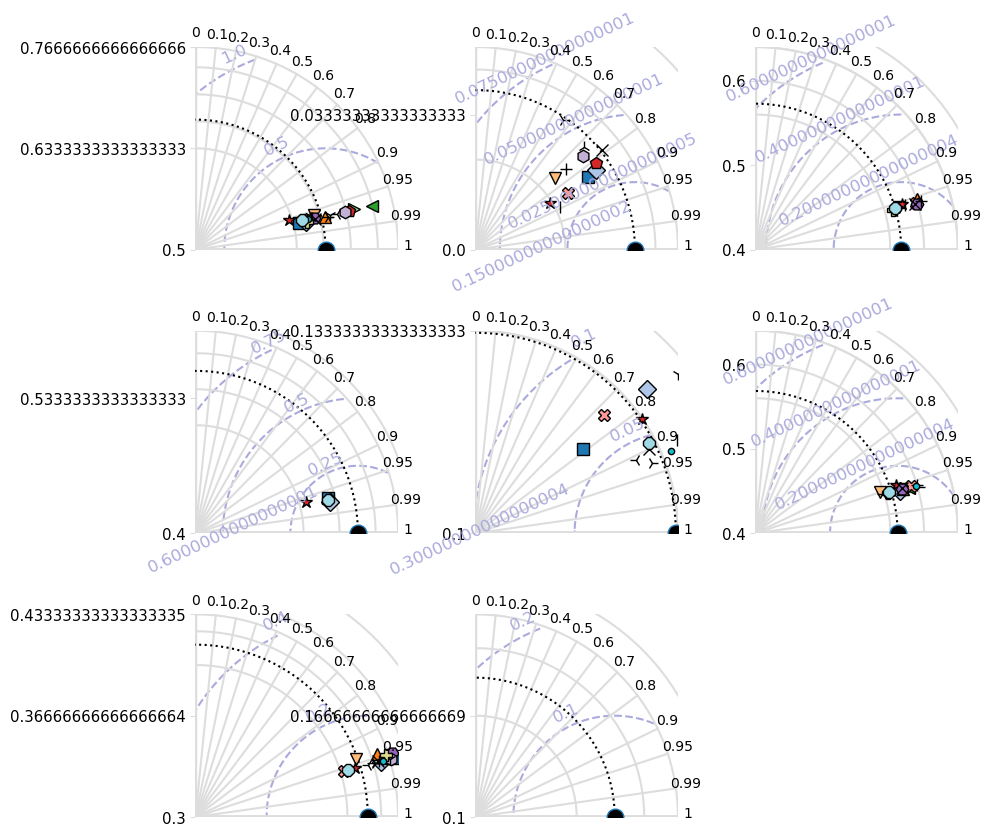

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

# Define a list of colors for diversity
colors = plt.cm.get_cmap("tab20", 23)  # Using a colormap to generate 22 colors

MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black for contrast)
        "color_face": plt.cm.tab20(i / len(model_names)),  # Unique face color per model
        "markersize": 9 if i > 0 else 12  # Larger size for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# specify some styles for the correlation component
COLS_COR = {
    'grid': '#DDDDDD',
    'tick_labels': '#000000',
    'title': '#000000'
}

# specify some styles for the standard deviation
COLS_STD = {
    'grid': '#DDDDDD',
    'tick_labels': '#000000',
    'ticks': '#DDDDDD',
    'title': '#000000'
}

# specify some styles for the root mean square deviation
STYLES_RMS = {
    'color': '#AAAADD',
    'linestyle': '--'
}

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)
j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev = values[:, 0]
    crmsd = values[:, 1]
    ccoef = values[:, 2]

    vmax = np.max(stdev)
    vmin = np.min(stdev)
    print(vmin)
    print(vmax)
    tick_interval = round((vmax - vmin) / 6, 1)
    stdticks = np.linspace(round(vmin, 1), round(vmax, 1), 4)

    print(vmin)
    print(vmax)
    print(stdticks)

    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev_obs),
        np.append(crmsd_obs, crmsd_obs),
        np.append(ccoef_obs, ccoef_obs),
        markercolors={
            "face": MARKERS["Obs"]["color_edge"],
            "edge": MARKERS["Obs"]["color_face"]
        },
        markersize=MARKERS["Obs"]["markersize"],
        markersymbol=MARKERS["Obs"]["marker"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    for model_id, (stdev, crmsd, ccoef) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev, stdev)),
            np.asarray((crmsd, crmsd)),
            np.asarray((ccoef, ccoef)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,
        )
    ax.set_xticks([])
    ax.set_yticklabels(stdticks)
    j += 1

plt.show()

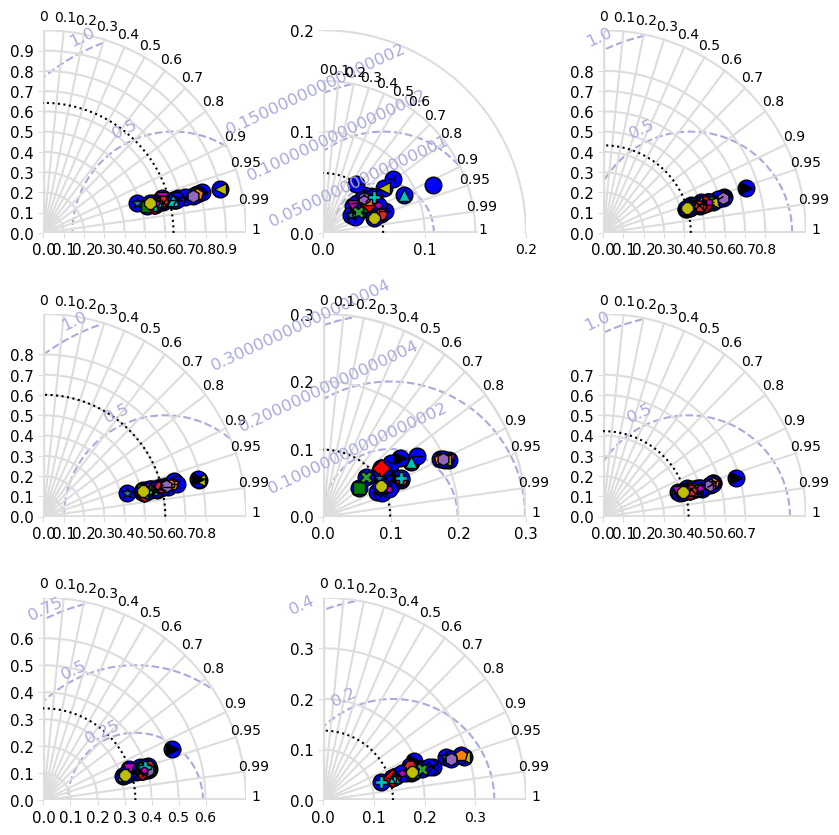

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev = values[:, 0]
    crmsd = values[:, 1]
    ccoef = values[:, 2]

    # Compute suitable tick intervals
    vmax = max(np.max(stdev), stdev_obs)
    vmin = 0  # Start at 0 for better visualization

    # Automatically choose a nice tick spacing
    range_std = vmax - vmin
    if range_std > 2:
        tick_step = 0.5
    elif range_std > 1:
        tick_step = 0.2
    else:
        tick_step = 0.1
    
    stdticks = np.arange(vmin, vmax + tick_step, tick_step)

    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": MARKERS["Obs"]["color_edge"]
        },
        markersize=MARKERS["Obs"]["markersize"],
        markersymbol=MARKERS["Obs"]["marker"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    for model_id, (stdev, crmsd, ccoef) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev, stdev)),
            np.asarray((crmsd, crmsd)),
            np.asarray((ccoef, ccoef)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent tick marks
        )

    # Set grid-aligned ticks
    ax.set_xticks(stdticks)
    ax.set_yticks(stdticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in stdticks])
    ax.set_yticklabels([f"{tick:.1f}" for tick in stdticks])

    j += 1

plt.show()


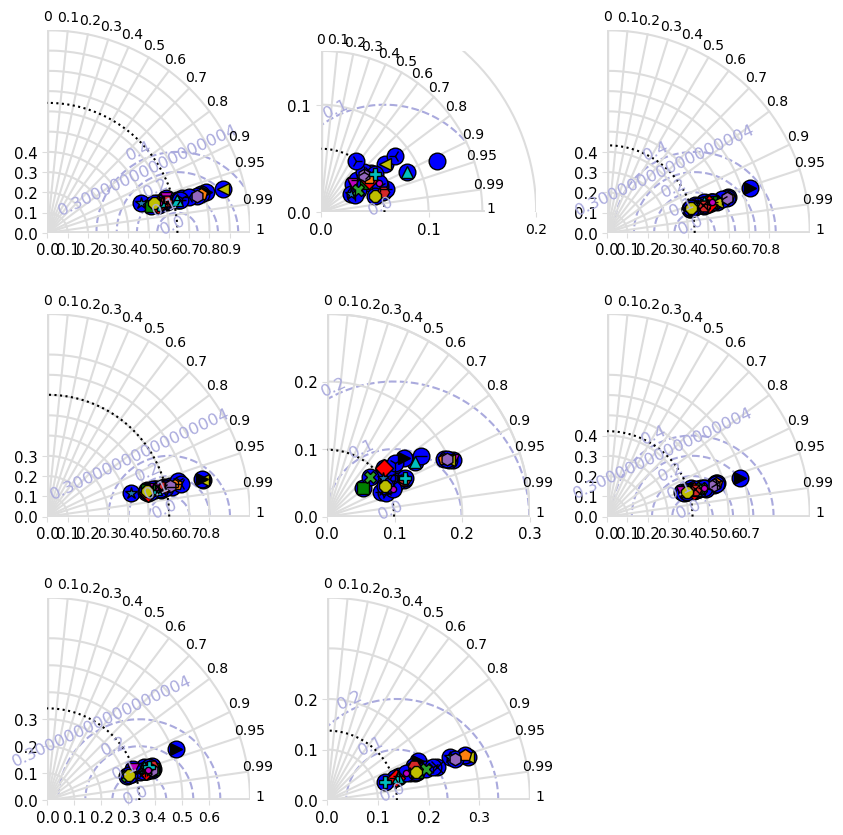

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev = values[:, 0]
    crmsd = values[:, 1]
    ccoef = values[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Function to determine optimal tick spacing
    def compute_tick_spacing(vmax):
        range_val = vmax - vmin
        if range_val > 2:
            return 0.5
        elif range_val > 1:
            return 0.2
        else:
            return 0.1
    
    tick_step_std = compute_tick_spacing(vmax_std)
    tick_step_rms = compute_tick_spacing(vmax_rms)

    stdticks = np.arange(vmin, vmax_std + tick_step_std, tick_step_std)
    rmsticks = np.arange(vmin, vmax_rms + tick_step_rms, tick_step_rms)

    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": MARKERS["Obs"]["color_edge"]
        },
        markersize=MARKERS["Obs"]["markersize"],
        markersymbol=MARKERS["Obs"]["marker"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # NEW: Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    for model_id, (stdev, crmsd, ccoef) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev, stdev)),
            np.asarray((crmsd, crmsd)),
            np.asarray((ccoef, ccoef)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_yticks(rmsticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in stdticks])
    ax.set_yticklabels([f"{tick:.1f}" for tick in rmsticks])

    j += 1

plt.show()


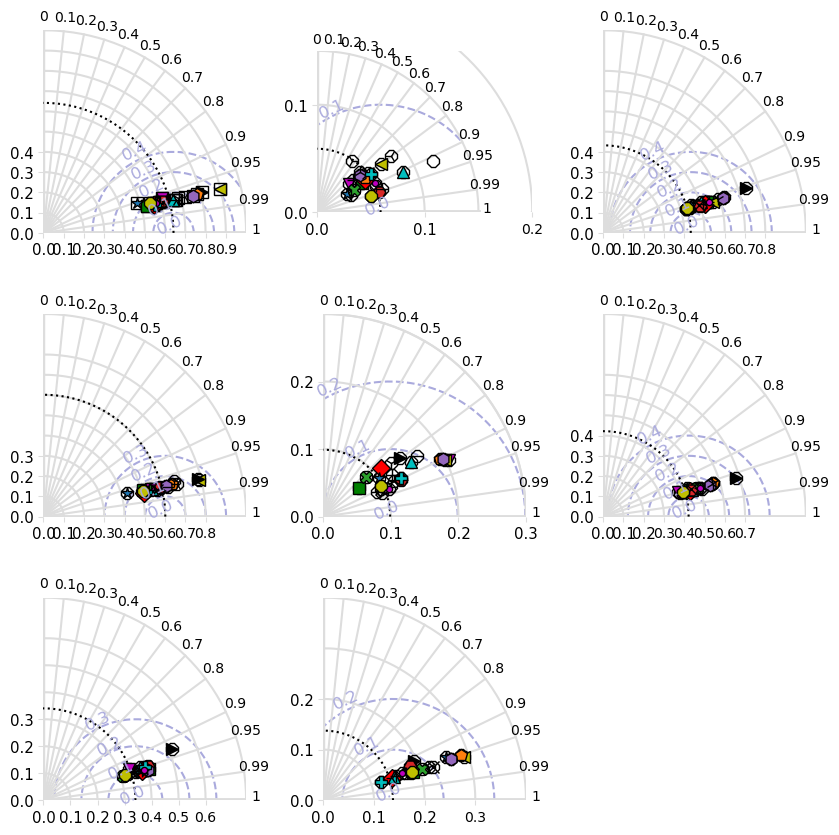

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.','8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev = values[:, 0]
    crmsd = values[:, 1]
    ccoef = values[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Function to determine optimal tick spacing
    def compute_tick_spacing(vmax):
        range_val = vmax - vmin
        if range_val > 2:
            return 0.5
        elif range_val > 1:
            return 0.2
        else:
            return 0.1
    
    tick_step_std = compute_tick_spacing(vmax_std)
    tick_step_rms = compute_tick_spacing(vmax_rms)

    stdticks = np.arange(vmin, vmax_std + tick_step_std, tick_step_std)
    rmsticks = np.arange(vmin, vmax_rms + tick_step_rms, tick_step_rms)

    # **Fix RMS Tick Precision Issue**
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # NEW: Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )


    for model_id, (stdev, crmsd, ccoef) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev, stdev)),
            np.asarray((crmsd, crmsd)),
            np.asarray((ccoef, ccoef)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_yticks(rmsticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in stdticks])  # Force 1 decimal place
    ax.set_yticklabels([f"{tick:.1f}" for tick in rmsticks])  # Force 1 decimal place

    j += 1

plt.show()


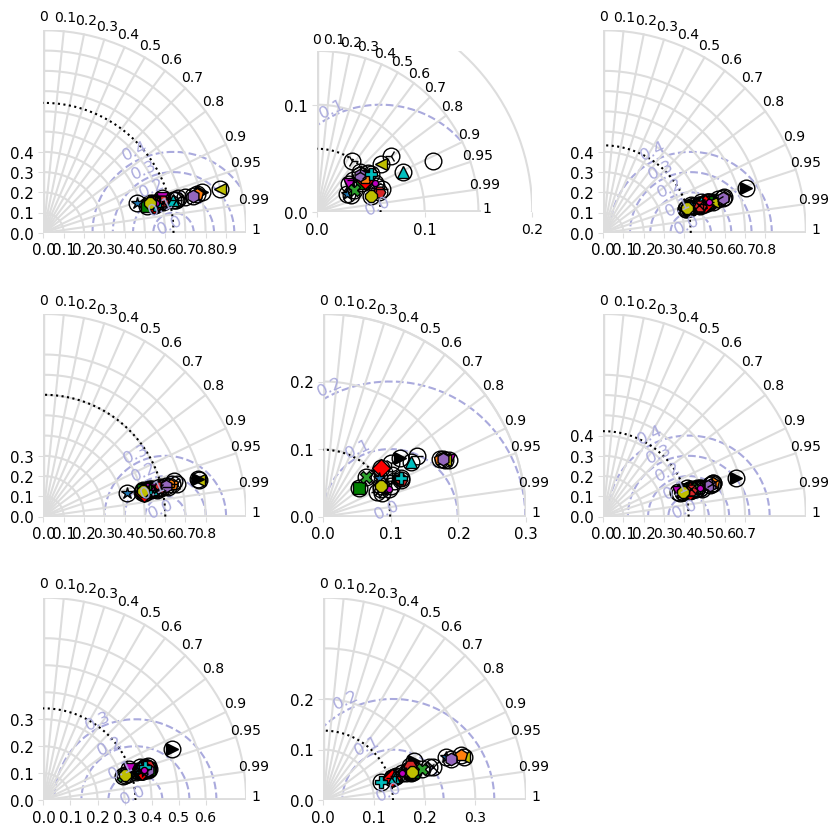

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Function to determine optimal tick spacing
    def compute_tick_spacing(vmax):
        range_val = vmax - vmin
        if range_val > 2:
            return 0.5
        elif range_val > 1:
            return 0.2
        else:
            return 0.1
    
    tick_step_std = compute_tick_spacing(vmax_std)
    tick_step_rms = compute_tick_spacing(vmax_rms)

    stdticks = np.arange(vmin, vmax_std + tick_step_std, tick_step_std)
    rmsticks = np.arange(vmin, vmax_rms + tick_step_rms, tick_step_rms)

    # Round RMS ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (larger marker for observation)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": MARKERS["Obs"]["color_edge"]
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_yticks(rmsticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in stdticks])  # Force 1 decimal place
    ax.set_yticklabels([f"{tick:.1f}" for tick in rmsticks])  # Force 1 decimal place

    j += 1

# Show the final plot
plt.show()


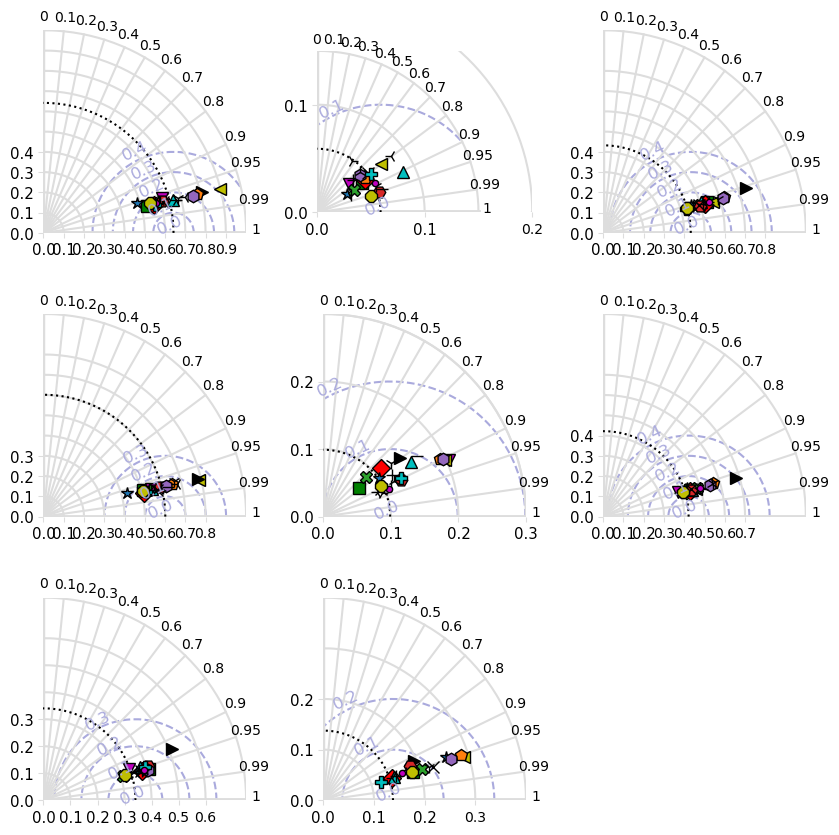

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Function to determine optimal tick spacing
    def compute_tick_spacing(vmax):
        range_val = vmax - vmin
        if range_val > 2:
            return 0.5
        elif range_val > 1:
            return 0.2
        else:
            return 0.1
    
    tick_step_std = compute_tick_spacing(vmax_std)
    tick_step_rms = compute_tick_spacing(vmax_rms)

    stdticks = np.arange(vmin, vmax_std + tick_step_std, tick_step_std)
    rmsticks = np.arange(vmin, vmax_rms + tick_step_rms, tick_step_rms)

    # Round RMS ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none' 
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the markers (both face and edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_yticks(rmsticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in stdticks])  # Force 1 decimal place
    ax.set_yticklabels([f"{tick:.1f}" for tick in rmsticks])  # Force 1 decimal place

    j += 1

# Show the final plot
plt.show()


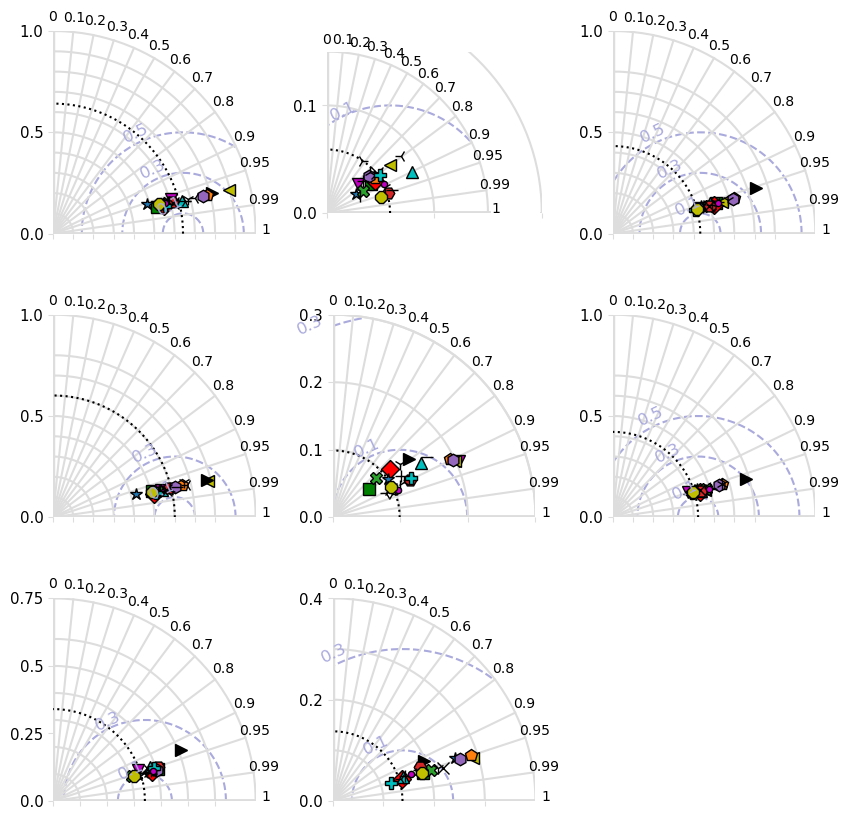

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.1  # Set a fixed tick step for standard deviation (STD)
    
    # Compute ticks for STD (0.2, 0.4, 0.6, ...)
    stdticks = np.arange(vmin, vmax_std + tick_step_std, tick_step_std)
    #stdticks = np.arange(0, 0.8, 0.01)
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.2, 0.4, 0.6, ...)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)

    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    #ax.set_yticks(stdticks)
    ax.set_xticklabels([])

    j += 1

# Show the final plot
plt.show()


In [224]:
dir(sm.taylor_diagram)


['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

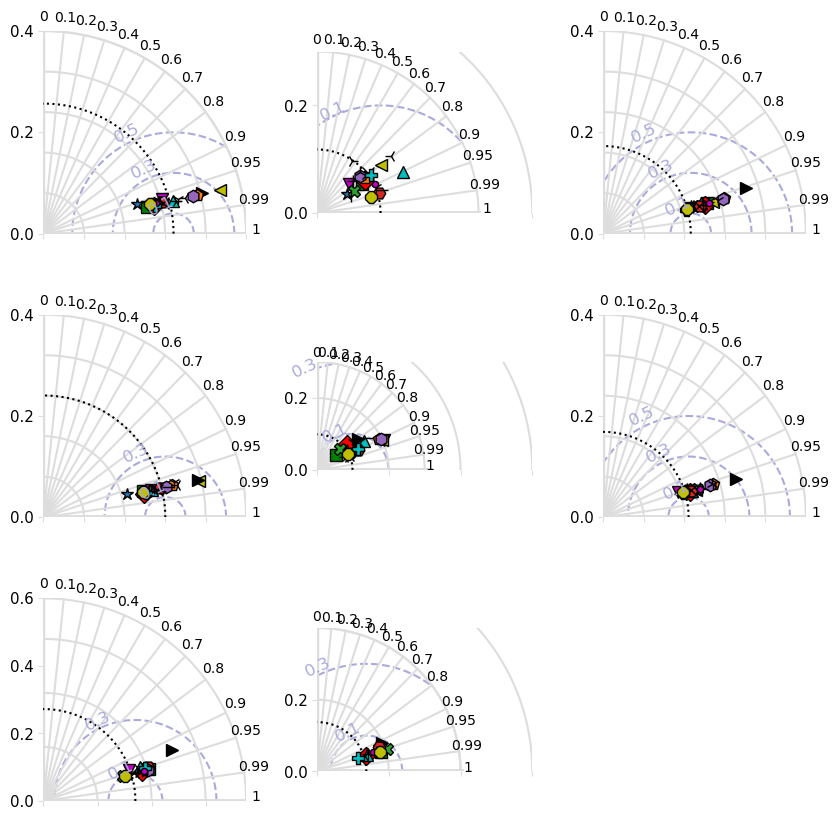

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.2  # Set a fixed tick step for standard deviation (STD)
    
    # Compute the nearest rounded multiple of tick_step_std for vmax_std
    rounded_vmax_std = np.ceil(vmax_std / tick_step_std) * tick_step_std  # Round up to nearest multiple
    
    # Compute ticks for STD
    stdticks = np.arange(vmin, rounded_vmax_std + tick_step_std, tick_step_std)
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.2, 0.4, 0.6, ...)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)

    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )
    ax.set_yticklabels(stdticks)

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_yticklabels(stdticks)
    ax.set_xticklabels([])

    j += 1

# Show the final plot
plt.show()


/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/skill_metrics/get_taylor_diagram_axes.py:70: RuntimeWarning: invalid value encountered in double_scalars
  axes['rinc']  = (axes['rmax'] - axes['rmin'])/rticks


ValueError: arange: cannot compute length

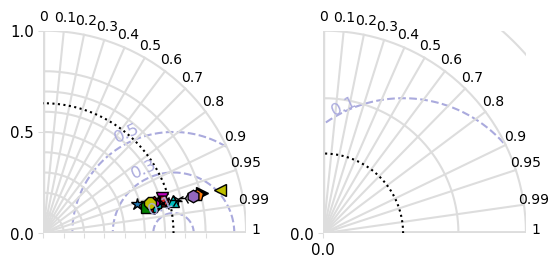

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.1  # Set a fixed tick step for standard deviation (STD)
    
    # Directly set the stdticks range from 0 to 0.8
    stdticks = np.arange(0, 0.9, tick_step_std)
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.2, 0.4, 0.6, ...)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)

    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_xticklabels([])

    j += 1

# Show the final plot
plt.show()


/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/skill_metrics/get_taylor_diagram_axes.py:70: RuntimeWarning: invalid value encountered in double_scalars
  axes['rinc']  = (axes['rmax'] - axes['rmin'])/rticks


ValueError: arange: cannot compute length

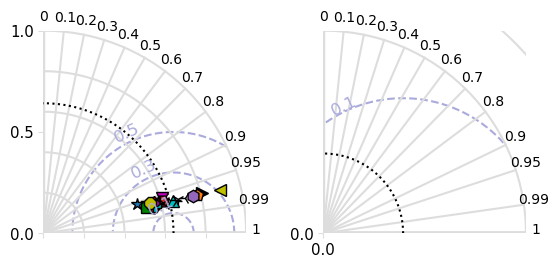

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.2  # Set a fixed tick step for standard deviation (STD)
    
    # Directly set the stdticks range from 0 to 0.8
    stdticks = np.arange(0, 0.9, tick_step_std)
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.2, 0.4, 0.6, ...)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)

    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_xticklabels([])

    j += 1

# Show the final plot
plt.show()


ValueError: Unrecognized option: rmin

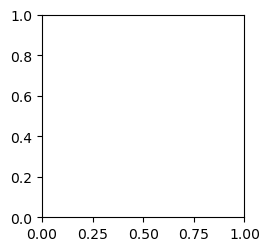

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.2  # Set a fixed tick step for standard deviation (STD)
    
    # Define the tick range for std ticks from 0 to 0.8
    stdticks = np.arange(0, 0.9, tick_step_std)  # STD ticks range from 0 to 0.8
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.1, 0.2, ..., vmax_rms)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)
    
    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Manually set rmin and rmax for better control
    rmin = 0.0  # Minimum radius value (STD)
    rmax = 0.8  # Maximum radius value (STD)

    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear',
        rmin=rmin,  # Manually set rmin
        rmax=rmax   # Manually set rmax
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
            rmin=rmin,  # Manually set rmin
            rmax=rmax   # Manually set rmax
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_xticklabels([])

    j += 1

# Show the final plot
plt.show()


/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/skill_metrics/get_taylor_diagram_axes.py:70: RuntimeWarning: invalid value encountered in double_scalars
  axes['rinc']  = (axes['rmax'] - axes['rmin'])/rticks


ValueError: arange: cannot compute length

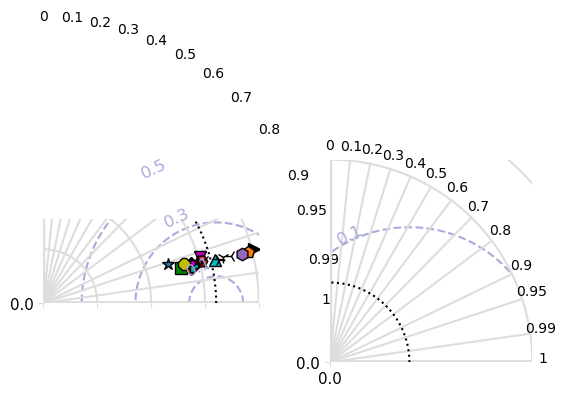

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.2  # Set a fixed tick step for standard deviation (STD)
    
    # Define the tick range for std ticks from 0 to 0.8
    stdticks = np.arange(0, 0.9, tick_step_std)  # STD ticks range from 0 to 0.8
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.1, 0.2, ..., vmax_rms)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)
    
    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear'
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_xticklabels([])

    # Set axis limits manually after plotting (if needed)
    ax.set_xlim([0, 0.8])  # Manually set x-axis range for STD
    ax.set_ylim([0, vmax_rms])  # Manually set y-axis range for RMS

    j += 1

# Show the final plot
plt.show()


/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/skill_metrics/get_taylor_diagram_axes.py:70: RuntimeWarning: invalid value encountered in double_scalars
  axes['rinc']  = (axes['rmax'] - axes['rmin'])/rticks


ValueError: arange: cannot compute length

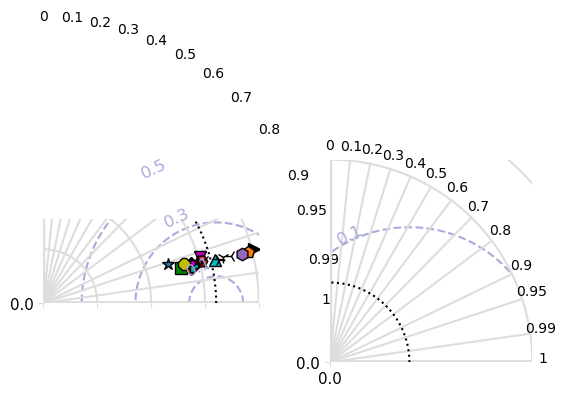

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import skill_metrics as sm  # Import SkillMetrics

# Sample model names and data
model_names = ['Obs'] + list(cmip6_shdr_ens_all.model.values)

# Define marker styles
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 '+', 'x', '|', '_', '1', '2', '3', '4', 'P', '.', '8']

# Define a list of colors for diversity
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 
          'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
          'tab:cyan'] * 2  # Repeat to ensure enough colors

# Create markers dictionary for each model
MARKERS = {}
for i, model in enumerate(model_names):
    MARKERS[model] = {
        "marker": marker_styles[i % len(marker_styles)],  # Cycle through available markers
        "color_edge": "#000000",  # Edge color (black)
        "color_face": colors[i % len(colors)],  # Assign distinct color
        "markersize": 9 if i > 0 else 12  # Larger for observation
    }

FONT_FAMILY = 'Times New Roman'
FONT_SIZE = 9

# Grid & Label Colors
COLS_COR = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'title': '#000000'}
COLS_STD = {'grid': '#DDDDDD', 'tick_labels': '#000000', 'ticks': '#DDDDDD', 'title': '#000000'}
STYLES_RMS = {'color': '#AAAADD', 'linestyle': '--'}

# Creating figure and grid
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig, wspace=0.3, hspace=0.4)

j = 0
for subplot_data in SUBPLOTS_DATA:
    ax = fig.add_subplot(gs[j])
    ax.set(adjustable='box', aspect='equal')

    # Extract observed and modeled data
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_data = np.array([m[1] for m in subplot_data["modeled"].items()])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    stdev = model_data[:, 0]
    crmsd = model_data[:, 1]
    ccoef = model_data[:, 2]

    # Compute suitable tick intervals
    vmax_std = max(np.max(stdev), stdev_obs)
    vmax_rms = max(np.max(crmsd), crmsd_obs)
    
    vmin = 0  # Start at 0 for better visualization

    # Set STD tick spacing to 0.2 (customized)
    tick_step_std = 0.2  # Set a fixed tick step for standard deviation (STD)
    
    # Define the tick range for std ticks from 0 to 0.8
    stdticks = np.arange(vmin, 0.9, tick_step_std)  # STD ticks range from 0 to 0.8
    
    # Set RMS tick spacing to 0.2 (customized for y-axis as well)
    tick_step_rms = 0.2  # Fixed tick step for RMS (same as STD)
    
    # Compute ticks for RMS (0.1, 0.2, ..., vmax_rms)
    rmsticks = np.arange(0.1, vmax_rms + tick_step_rms, tick_step_rms)
    
    # Round ticks for consistency
    stdticks = np.round(stdticks, 1)  # Round STD ticks to 1 decimal place
    rmsticks = np.round(rmsticks, 1)  # Round RMS ticks to 1 decimal place
    
    # Plot the observed data (transparent markers)
    sm.taylor_diagram(
        ax,
        np.append(stdev_obs, stdev),
        np.append(crmsd_obs, crmsd),
        np.append(ccoef_obs, ccoef),
        markersymbol=MARKERS["Obs"]["marker"],
        markercolors={
            "face": MARKERS["Obs"]["color_face"],
            "edge": 'none'  # Set edge color to 'none' to make the edge transparent
        },
        markersize=MARKERS["Obs"]["markersize"],
        styleOBS=':',
        colOBS=MARKERS["Obs"]["color_edge"],
        alpha=0,  # Set transparency for the face (this should be redundant with 'none' for the edge)
        titleSTD='off',
        titleRMS='off',
        titleCOR='off',
        tickSTD=stdticks,  # Ensuring proper STD tick placement
        tickRMS=rmsticks,  # Ensuring proper RMS tick placement
        showlabelsRMS='on',
        colRMS=STYLES_RMS['color'],
        tickRMSangle=115,
        styleRMS=STYLES_RMS['linestyle'],
        colscor=COLS_COR,
        colsstd=COLS_STD,
        styleCOR='-',
        styleSTD='-',
        colframe='#DDDDDD',
        labelweight='normal',
        titlecorshape='linear'
    )

    # Plot the modeled data (smaller markers for models)
    for model_id, (stdev_val, crmsd_val, ccoef_val) in subplot_data["modeled"].items():
        marker = MARKERS[model_id]  # Get model-specific marker

        sm.taylor_diagram(
            ax,
            np.asarray((stdev_val, stdev_val)),
            np.asarray((crmsd_val, crmsd_val)),
            np.asarray((ccoef_val, ccoef_val)),
            markersymbol=marker["marker"],
            markercolors={
                "face": marker["color_face"],
                "edge": marker["color_edge"]
            },
            markersize=marker["markersize"],
            overlay='on',
            styleCOR='-',
            styleSTD='-',
            tickSTD=stdticks,  # Ensuring consistent STD tick marks
            tickRMS=rmsticks,  # Ensuring consistent RMS tick marks
        )

    # Set grid-aligned ticks for both STD and RMS
    ax.set_xticks(stdticks)
    ax.set_xticklabels([])

    # Set axis limits manually after plotting (if needed)
    ax.set_xlim([0, 0.8])  # Manually set x-axis range for STD
    ax.set_ylim([0, vmax_rms])  # Manually set y-axis range for RMS

    j += 1

# Show the final plot
plt.show()
